<a href="https://colab.research.google.com/github/Northenwest/4522210089_JeremyNathanaelSidabutar/blob/main/MilkQualityPrediction_JeremyNathanaelSidabutar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cpluzshrijayan/milkquality")

print("Path to dataset files:", path)

100%|██████████| 1.24k/1.24k [00:00<00:00, 1.52MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/cpluzshrijayan/milkquality/versions/1


In [2]:
import pandas as pd
import os

# Assuming the dataset is in a CSV file within the downloaded directory
# We need to find the CSV file first
dataset_path = "/root/.cache/kagglehub/datasets/cpluzshrijayan/milkquality/versions/1"
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

if len(csv_files) > 0:
    csv_file_path = os.path.join(dataset_path, csv_files[0])
    df = pd.read_csv(csv_file_path)
    display(df.head())
else:
    print("No CSV files found in the dataset directory.")

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


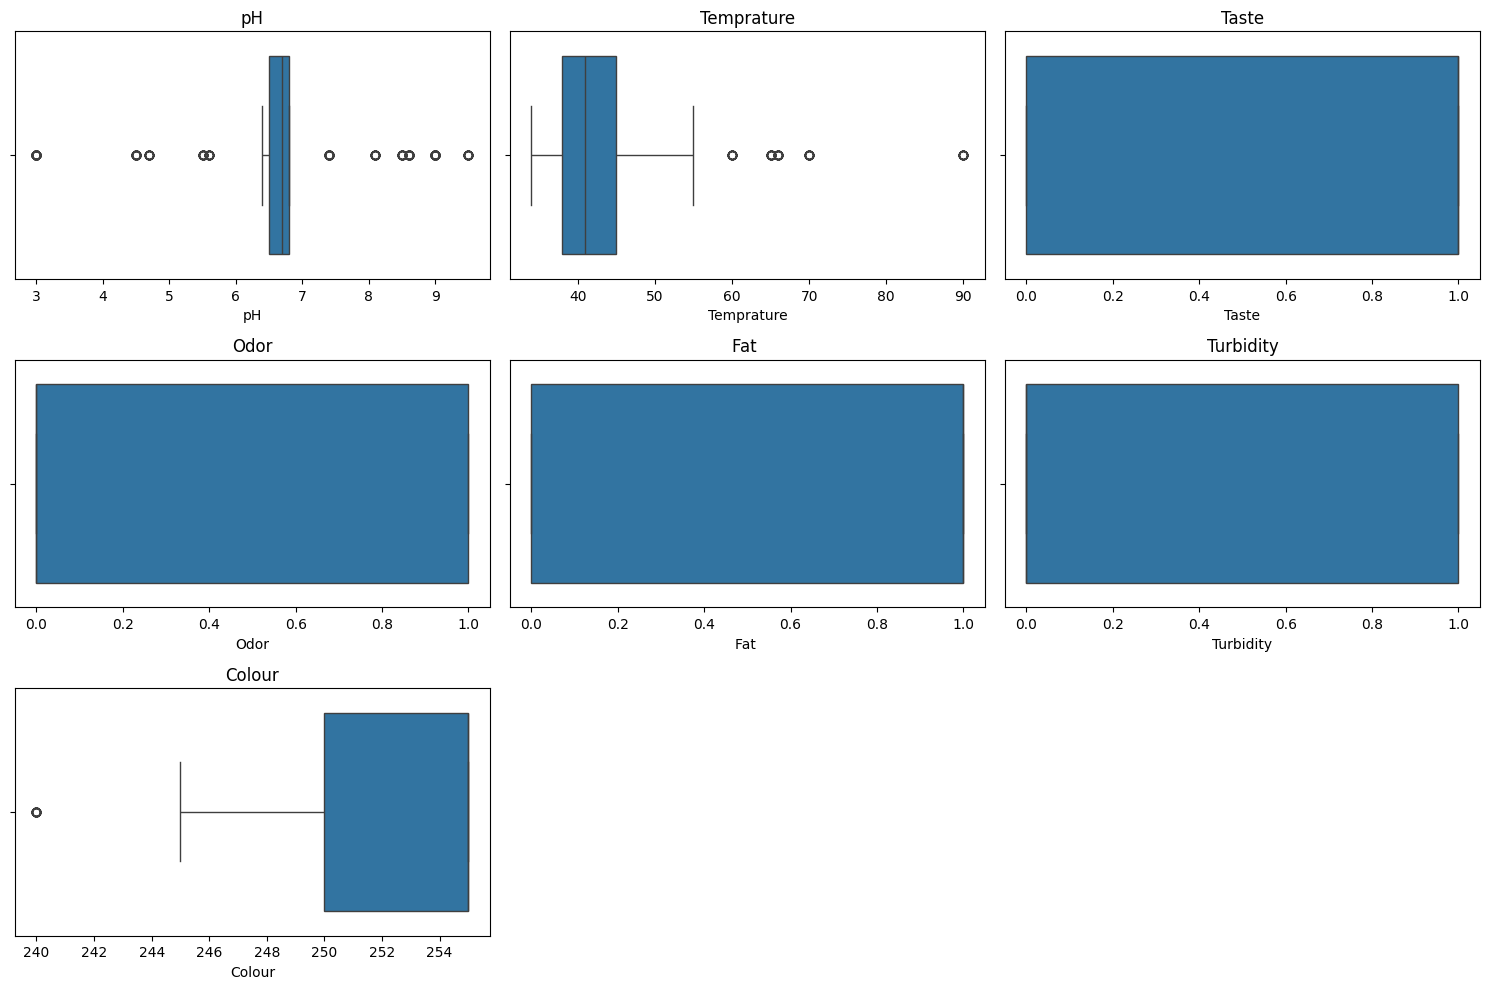

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for plotting
numerical_cols = df.select_dtypes(include=['number']).columns

# Create box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Separate features and target variable
X = df.drop('Grade', axis=1)
y = df['Grade']

# Before sampling
print(f"Original dataset shape: {Counter(y)}")

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
print(f"Resampled dataset shape (SMOTE): {Counter(y_resampled_smote)}")

# Undersampling with RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)
print(f"Resampled dataset shape (RandomUnderSampler): {Counter(y_resampled_rus)}")

Original dataset shape: Counter({'low': 429, 'medium': 374, 'high': 256})
Resampled dataset shape (SMOTE): Counter({'high': 429, 'low': 429, 'medium': 429})
Resampled dataset shape (RandomUnderSampler): Counter({'high': 256, 'low': 256, 'medium': 256})


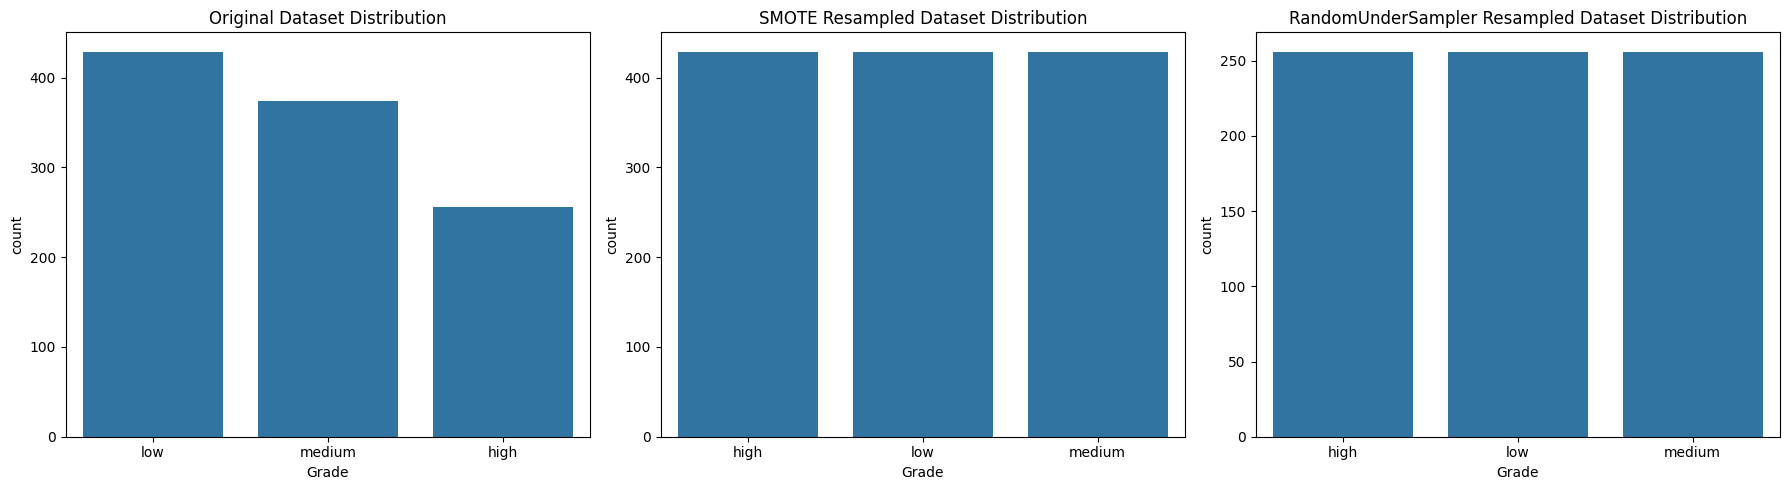

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Visualize original distribution
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Original Dataset Distribution')

# Visualize SMOTE distribution
plt.subplot(1, 3, 2)
sns.countplot(x=y_resampled_smote, order=Counter(y_resampled_smote).keys())
plt.title('SMOTE Resampled Dataset Distribution')

# Visualize RandomUnderSampler distribution
plt.subplot(1, 3, 3)
sns.countplot(x=y_resampled_rus, order=Counter(y_resampled_rus).keys())
plt.title('RandomUnderSampler Resampled Dataset Distribution')

plt.tight_layout()
plt.show()

In [10]:
import numpy as np

# Function to handle outliers by capping with IQR bounds
def handle_outliers_cap(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply outlier handling to specific numerical columns
numerical_cols = ['pH', 'Temprature', 'Colour']
df_cleaned = df.copy() # Create a copy to avoid modifying the original DataFrame

for col in numerical_cols:
    df_cleaned = handle_outliers_cap(df_cleaned, col)

print("Outliers handled by capping with IQR bounds on selected columns.")
display(df_cleaned.head())

Outliers handled by capping with IQR bounds on selected columns.


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.60,35.0,1,0,1,0,254.0,high
1,6.60,36.0,0,1,0,1,253.0,high
2,7.25,55.5,1,1,1,1,246.0,low
3,7.25,34.0,1,1,0,1,255.0,low
4,6.60,37.0,0,0,0,0,255.0,medium


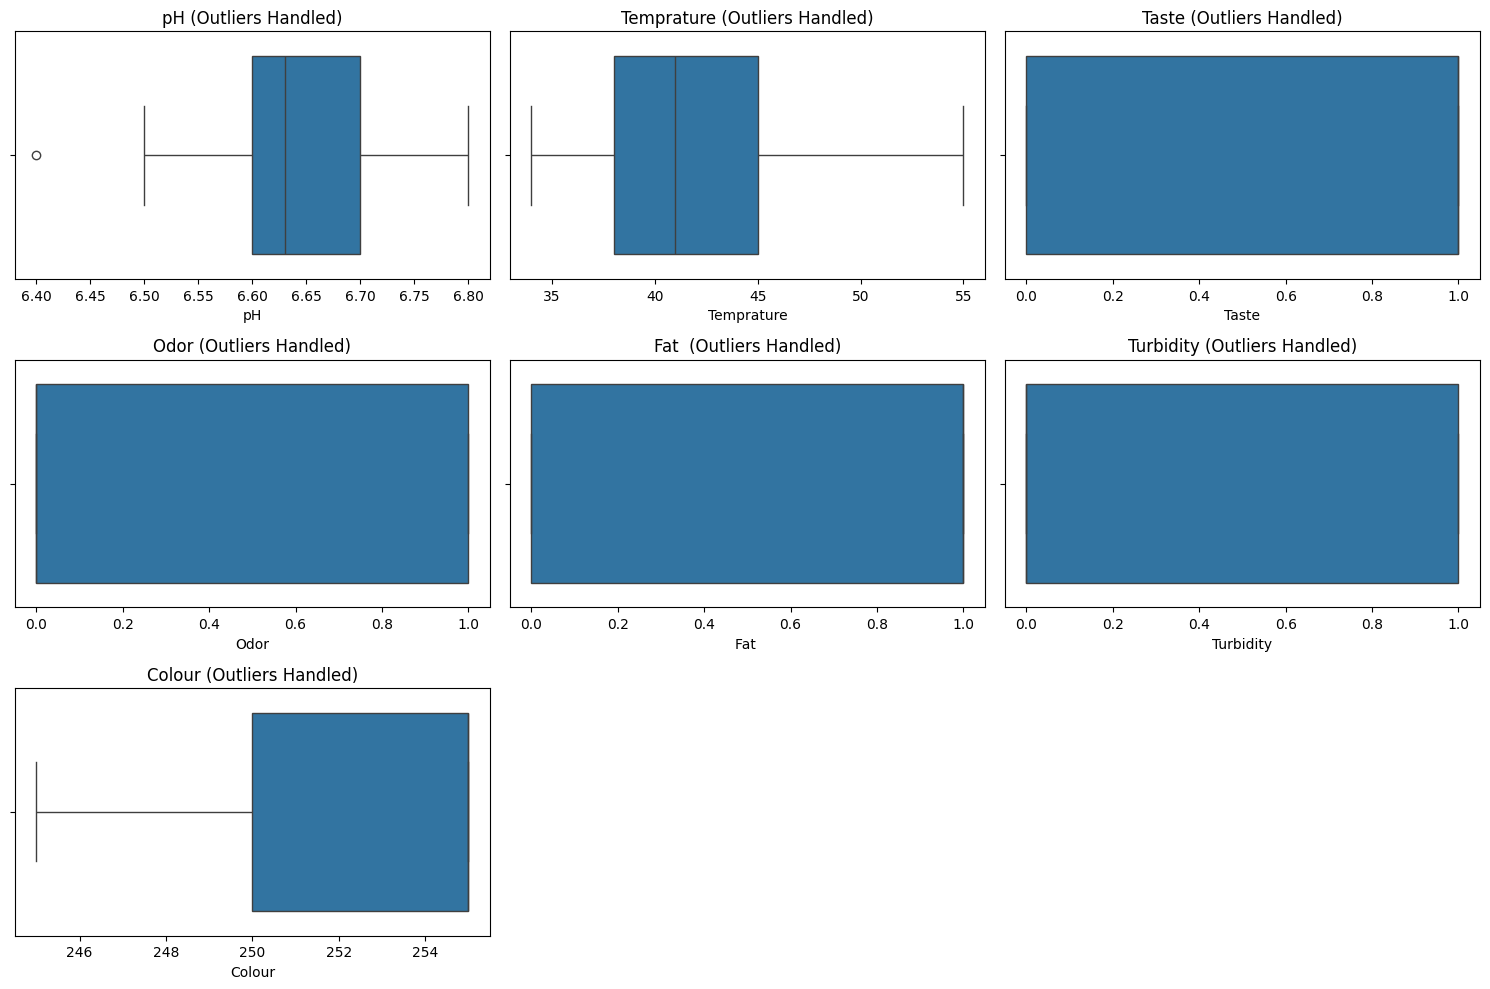

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns for plotting from the cleaned DataFrame
numerical_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns

# Create box plots for numerical columns in the cleaned DataFrame
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_cleaned):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'{col} (Outliers Handled)')

plt.tight_layout()
plt.show()

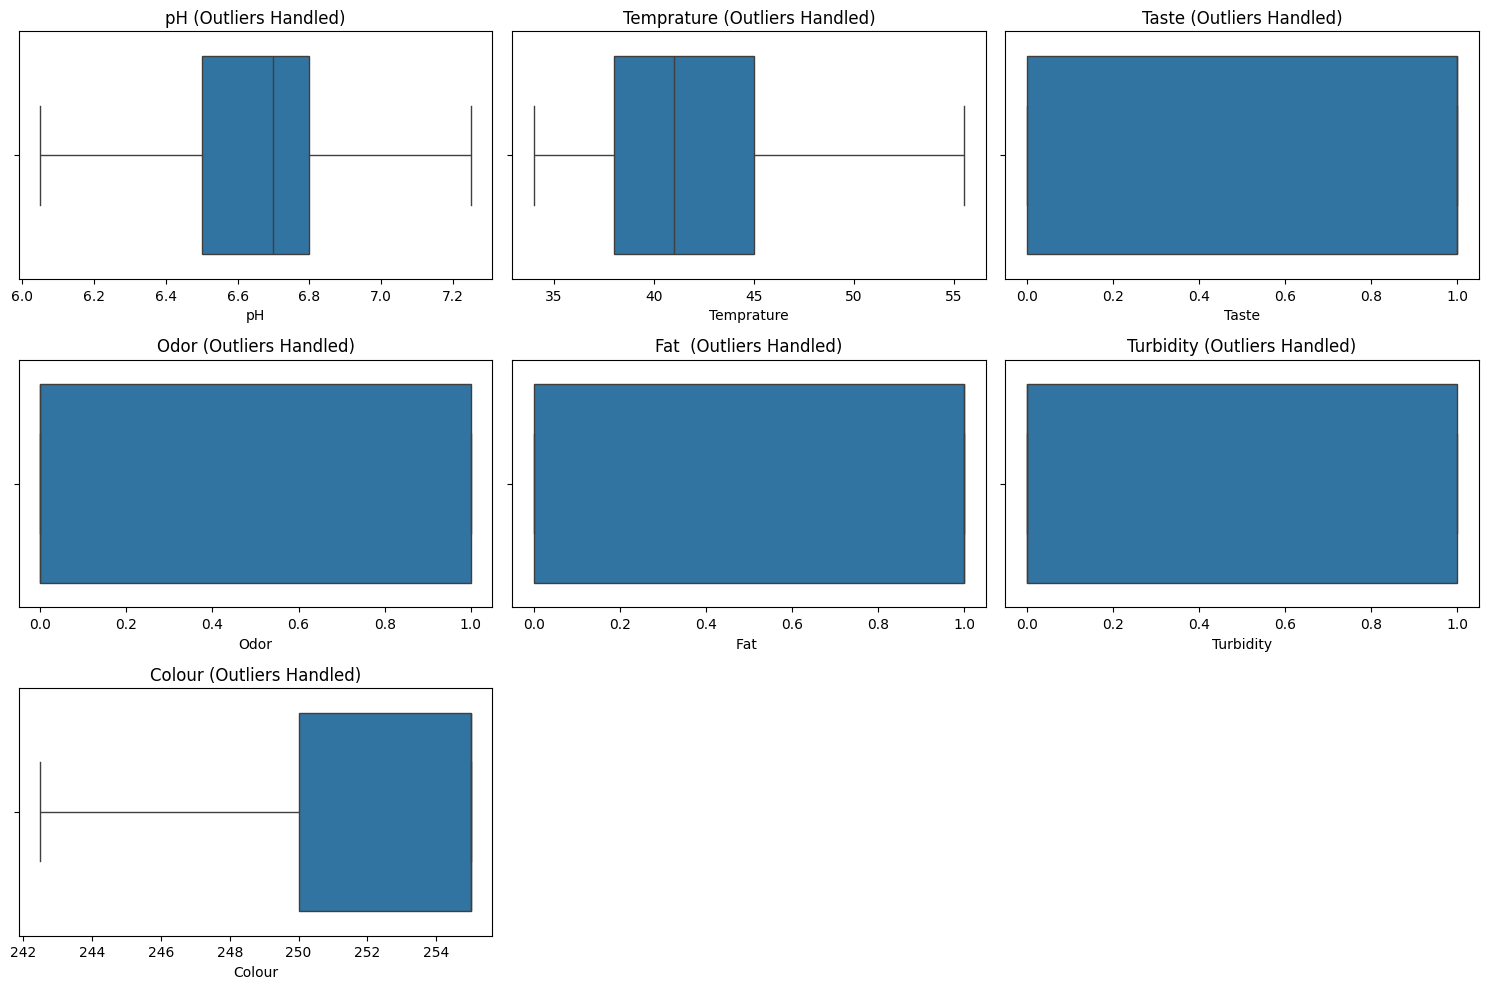

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns for plotting from the cleaned DataFrame
numerical_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns

# Create box plots for numerical columns in the cleaned DataFrame
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_cleaned):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'{col} (Outliers Handled)')

plt.tight_layout()
plt.show()

In [13]:
df.duplicated().sum()

np.int64(976)

In [14]:
# Check for duplicate rows
print(f"Number of duplicate rows before removal: {df_cleaned.duplicated().sum()}")

# Remove duplicate rows
df_cleaned_no_duplicates = df_cleaned.drop_duplicates().copy()

print(f"Number of duplicate rows after removal: {df_cleaned_no_duplicates.duplicated().sum()}")
print(f"Shape of the DataFrame after removing duplicates: {df_cleaned_no_duplicates.shape}")

display(df_cleaned_no_duplicates.head())

Number of duplicate rows before removal: 977
Number of duplicate rows after removal: 0
Shape of the DataFrame after removing duplicates: (82, 8)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.60,35.0,1,0,1,0,254.0,high
1,6.60,36.0,0,1,0,1,253.0,high
2,7.25,55.5,1,1,1,1,246.0,low
3,7.25,34.0,1,1,0,1,255.0,low
4,6.60,37.0,0,0,0,0,255.0,medium


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Grade' column
df_cleaned_encoded = df_cleaned_no_duplicates.copy()
df_cleaned_encoded['Grade_Encoded'] = label_encoder.fit_transform(df_cleaned_encoded['Grade'])

print("Label encoding applied to the 'Grade' column.")
display(df_cleaned_encoded.head())
display(df_cleaned_encoded['Grade_Encoded'].value_counts())

Label encoding applied to the 'Grade' column.


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,Grade_Encoded
0,6.60,35.0,1,0,1,0,254.0,high,0
1,6.60,36.0,0,1,0,1,253.0,high,0
2,7.25,55.5,1,1,1,1,246.0,low,1
3,7.25,34.0,1,1,0,1,255.0,low,1
4,6.60,37.0,0,0,0,0,255.0,medium,2


,count
Grade_Encoded,
2,34
1,25
0,23


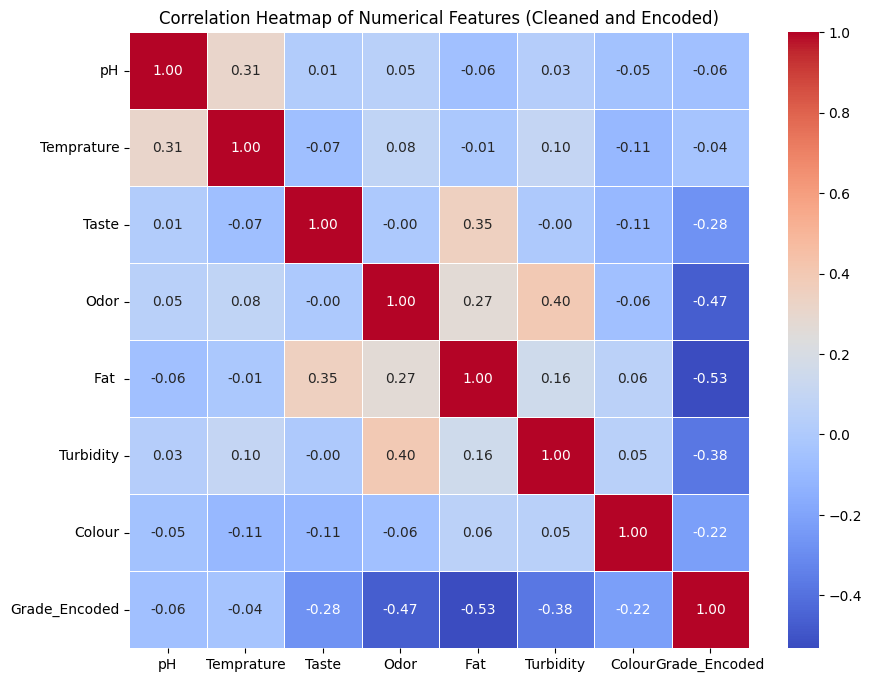

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns from the cleaned and encoded DataFrame
numerical_cols_encoded = df_cleaned_encoded.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df_cleaned_encoded[numerical_cols_encoded].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features (Cleaned and Encoded)')
plt.show()

In [17]:
# Drop the specified columns
columns_to_drop = ['Colour', 'Taste', 'Temprature']
df_cleaned_encoded_dropped = df_cleaned_encoded.drop(columns=columns_to_drop)

print(f"Columns {columns_to_drop} have been dropped.")
display(df_cleaned_encoded_dropped.head())

Columns ['Colour', 'Taste', 'Temprature'] have been dropped.


,pH,Odor,Fat,Turbidity,Grade,Grade_Encoded
0,6.60,0,1,0,high,0
1,6.60,1,0,1,high,0
2,7.25,1,1,1,low,1
3,7.25,1,0,1,low,1
4,6.60,0,0,0,medium,2


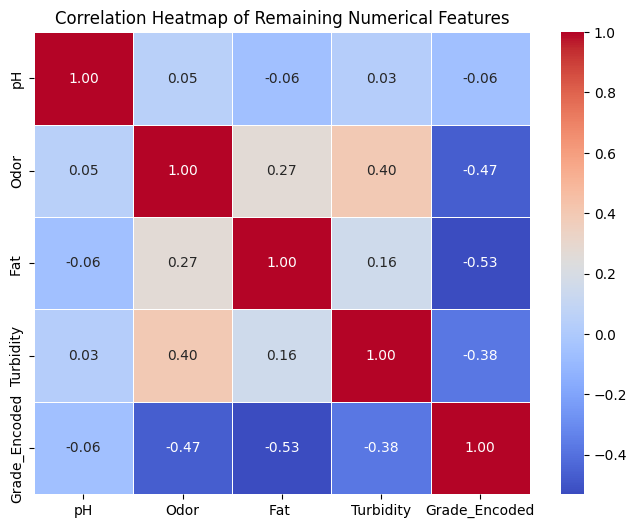

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns from the DataFrame after dropping columns
numerical_cols_dropped = df_cleaned_encoded_dropped.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix_dropped = df_cleaned_encoded_dropped[numerical_cols_dropped].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_dropped, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Remaining Numerical Features')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_cleaned_encoded_dropped.drop(['Grade', 'Grade_Encoded'], axis=1)
y = df_cleaned_encoded_dropped['Grade_Encoded']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (65, 4)
X_test shape: (17, 4)
y_train shape: (65,)
y_test shape: (17,)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7058823529411765
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       1.00      0.40      0.57         5
           2       0.64      1.00      0.78         7

    accuracy                           0.71        17
   macro avg       0.80      0.67      0.67        17
weighted avg       0.78      0.71      0.68        17



In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Decision Tree Classification Report:")
print(report_dt)

Decision Tree Accuracy: 0.7647058823529411
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.60      0.60      0.60         5
           2       0.86      0.86      0.86         7

    accuracy                           0.76        17
   macro avg       0.75      0.75      0.75        17
weighted avg       0.76      0.76      0.76        17



In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train an SVM Classifier model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(report_svm)

SVM Accuracy: 0.5882352941176471
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.50      0.20      0.29         5
           2       0.54      1.00      0.70         7

    accuracy                           0.59        17
   macro avg       0.68      0.53      0.52        17
weighted avg       0.66      0.59      0.54        17

